# Разведочный анализ данных

## Shoppers

**Online Shoppers Purchasing Intention Dataset**

## Импорт библиотек и загрузка данных

In [1]:
import pandas as pd
import numpy as np
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from ydata_profiling import ProfileReport

In [2]:
dataset = 'https://raw.githubusercontent.com/aiedu-courses/stepik_eda_and_dev_tools/main/datasets/online_shoppers_intention.csv'

In [3]:
df = pd.read_csv(dataset)
df_pl = pl.read_csv(dataset)

## Исследование данных

In [4]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [5]:
df.shape

(12330, 18)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12131 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  11839 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12231 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [7]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12131.000000,12330.000000,11839.000000,12330.000000,12231.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.724502,31.731468,1190.534914,0.022191,0.043021,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,141.655684,44.475503,1908.447706,0.048488,0.048562,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,183.854167,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,597.625000,0.003112,0.025141,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1462.554562,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [8]:
df.describe(include='all')

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12131.000000,12330.000000,11839.000000,12330.000000,12231.000000,12330.000000,12330.000000,12330,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330,12330
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,NaN,NaN,NaN,NaN,3,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May,NaN,NaN,NaN,NaN,Returning_Visitor,False,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3348,NaN,NaN,NaN,NaN,10551,9462,10422
mean,2.315166,80.818611,0.503569,34.724502,31.731468,1190.534914,0.022191,0.043021,5.889258,0.061427,NaN,2.124006,2.357097,3.147364,4.069586,NaN,NaN,NaN
std,3.321784,176.779107,1.270156,141.655684,44.475503,1908.447706,0.048488,0.048562,18.568437,0.198917,NaN,0.911325,1.717277,2.401591,4.025169,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,7.000000,183.854167,0.000000,0.014286,0.000000,0.000000,NaN,2.000000,2.000000,1.000000,2.000000,NaN,NaN,NaN
50%,1.000000,7.500000,0.000000,0.000000,18.000000,597.625000,0.003112,0.025141,0.000000,0.000000,NaN,2.000000,2.000000,3.000000,2.000000,NaN,NaN,NaN
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1462.554562,0.016813,0.050000,0.000000,0.000000,NaN,3.000000,2.000000,4.000000,4.000000,NaN,NaN,NaN


In [9]:
df.duplicated().sum()

109

In [10]:
df[df.duplicated()]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
159,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,3,2,3,3,Returning_Visitor,False,False
178,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,3,2,3,3,Returning_Visitor,False,False
418,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Mar,1,1,1,1,Returning_Visitor,True,False
456,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Mar,2,2,4,1,Returning_Visitor,False,False
512,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Mar,2,2,1,1,Returning_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11827,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,2,2,1,1,Returning_Visitor,False,False
11938,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,1,4,1,Returning_Visitor,True,False
12159,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,1,1,3,Returning_Visitor,False,False
12180,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,13,9,20,Returning_Visitor,False,False


In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df = df.reset_index(drop=True)

In [13]:
df.isna().sum()

Administrative               0
Administrative_Duration      0
Informational                0
Informational_Duration     199
ProductRelated               0
ProductRelated_Duration    489
BounceRates                  0
ExitRates                   99
PageValues                   0
SpecialDay                   0
Month                        0
OperatingSystems             0
Browser                      0
Region                       0
TrafficType                  0
VisitorType                  0
Weekend                      0
Revenue                      0
dtype: int64

Пропуски в длительности посещения это скорее всего 0, а даже если не так, то 0 это все равно мода этих признаков. 

In [14]:
df = df.fillna(0)

## Однофакторный анализ

Распределения значений признаков

array([[<Axes: title={'center': 'Administrative'}>,
        <Axes: title={'center': 'Administrative_Duration'}>,
        <Axes: title={'center': 'Informational'}>,
        <Axes: title={'center': 'Informational_Duration'}>],
       [<Axes: title={'center': 'ProductRelated'}>,
        <Axes: title={'center': 'ProductRelated_Duration'}>,
        <Axes: title={'center': 'BounceRates'}>,
        <Axes: title={'center': 'ExitRates'}>],
       [<Axes: title={'center': 'PageValues'}>,
        <Axes: title={'center': 'SpecialDay'}>,
        <Axes: title={'center': 'OperatingSystems'}>,
        <Axes: title={'center': 'Browser'}>],
       [<Axes: title={'center': 'Region'}>,
        <Axes: title={'center': 'TrafficType'}>, <Axes: >, <Axes: >]],
      dtype=object)

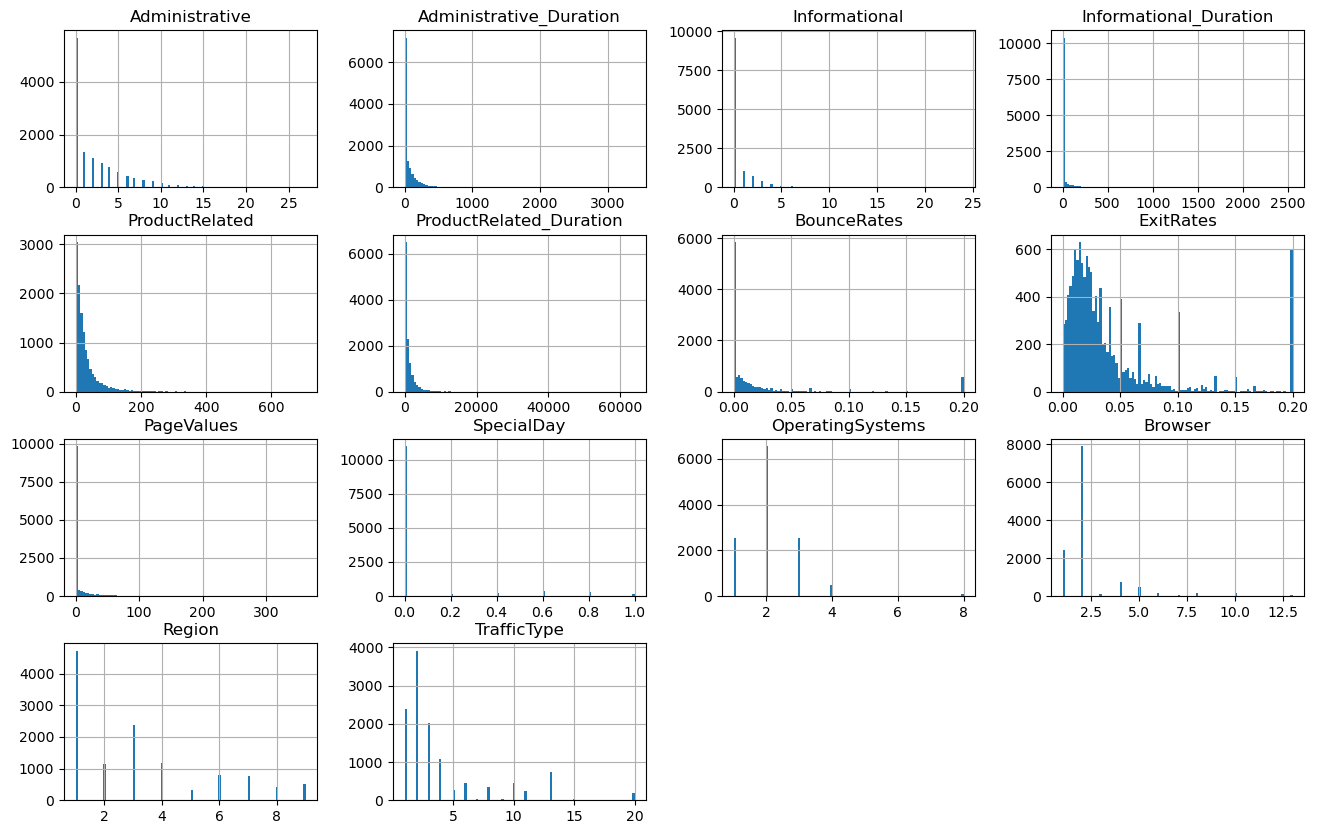

In [15]:
df.hist(bins=100, figsize=(16,10))

Аномалий или ошибочных значений не замечено

In [16]:
cat_features = ['Browser', 'Region', 'TrafficType', 'OperatingSystems', 'Month', 'VisitorType', 'Weekend']

Корреляции между числовыми признаками и целевой переменной

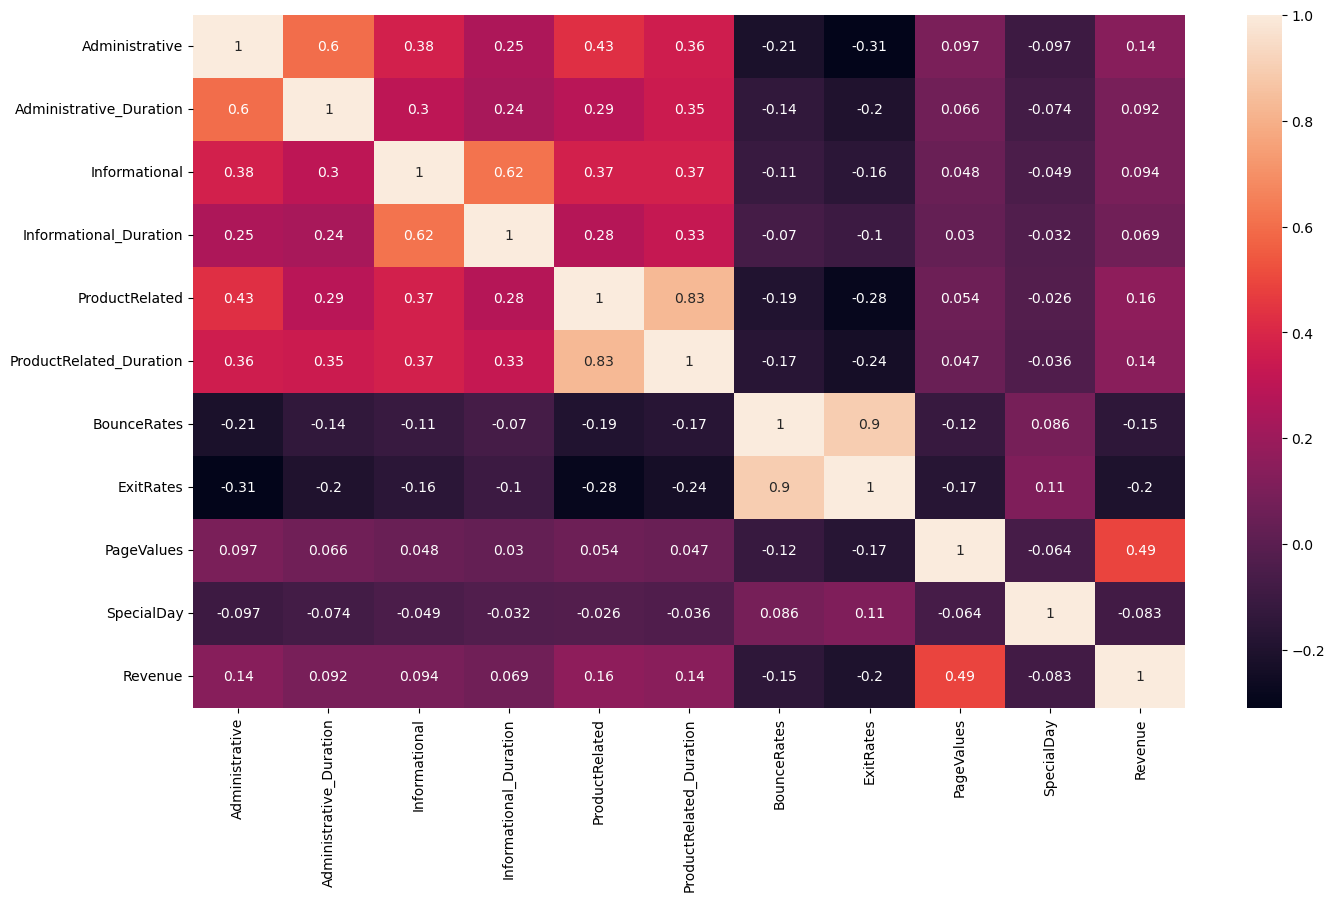

In [17]:
corr = df.drop(cat_features, axis=1).corr()

plt.figure(figsize=(16, 9))
sns.heatmap(corr, annot=True)
plt.show()

Наблюдается очень большая корреляция между BonusRates и ExitRates. Возможно какой-то из этих столбцов придется удалить для избежания мультиколлинеарности. Также видно, что признак PageValues сильно коррелирует с целевой переменной. 

<Axes: xlabel='Revenue', ylabel='PageValues'>

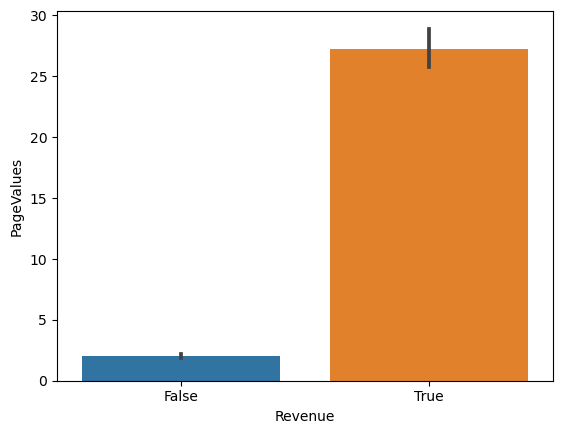

In [18]:
sns.barplot(x=df['Revenue'], y=df['PageValues'])

V-мера Крамера для категориальных признков

In [19]:
import association_metrics as am

df_cat = df[cat_features].astype('category')
df_cat['Revenue'] = df['Revenue'].astype('category')

cramersv = am.CramersV(df_cat)

cramersv.fit()

,Browser,Region,TrafficType,OperatingSystems,Month,VisitorType,Weekend,Revenue
Browser,1.000000,0.125797,0.189186,0.594720,0.066652,0.504222,0.087512,0.048904
Region,0.125797,1.000000,0.085438,0.114603,0.046936,0.174016,0.029911,0.028040
TrafficType,0.189186,0.085438,1.000000,0.191472,0.190177,0.375859,0.150928,0.171864
OperatingSystems,0.594720,0.114603,0.191472,1.000000,0.062831,0.453646,0.119875,0.078437
Month,0.066652,0.046936,0.190177,0.062831,1.000000,0.137443,0.065412,0.175961
VisitorType,0.504222,0.174016,0.375859,0.453646,0.137443,1.000000,0.053418,0.103550
Weekend,0.087512,0.029911,0.150928,0.119875,0.065412,0.053418,1.000000,0.027858
Revenue,0.048904,0.028040,0.171864,0.078437,0.175961,0.103550,0.027858,1.000000


Видно, что некоторые категориальные признаки хоть и не сильно, но коррелируют с целевой переменной.

ANOVA для измерения связи между категориальными и числовыми признаками

In [20]:
Data = []


for c1 in df.columns:
    for c2 in df.columns:
        if c1 in cat_features and c2 not in cat_features:
            CategoryGroupLists = df.groupby(c1)[c2].apply(list)
            AnovaResults = f_oneway(*CategoryGroupLists)

            if AnovaResults[1] >= 0.05:
                Data.append({'Category' : c1, 'Numerical' : c2, 'Is correlated' : 'No'})
            else:
                Data.append({'Category' : c1, 'Numerical' : c2, 'Is correlated' : 'Yes'})

AnovaRes = pd.DataFrame.from_dict(Data)
AnovaRes

,Category,Numerical,Is correlated
0,Month,Administrative,Yes
1,Month,Administrative_Duration,Yes
2,Month,Informational,Yes
3,Month,Informational_Duration,Yes
4,Month,ProductRelated,Yes
...,...,...,...
72,Weekend,BounceRates,Yes
73,Weekend,ExitRates,Yes
74,Weekend,PageValues,No
75,Weekend,SpecialDay,No


In [21]:
AnovaRes[AnovaRes['Is correlated'] == 'No']

,Category,Numerical,Is correlated
11,OperatingSystems,Administrative,No
14,OperatingSystems,Informational_Duration,No
23,Browser,Administrative_Duration,No
33,Region,Administrative,No
34,Region,Administrative_Duration,No
36,Region,Informational_Duration,No
39,Region,BounceRates,No
40,Region,ExitRates,No
42,Region,SpecialDay,No
43,Region,Revenue,No


Из этого можно сделать вывод что почти  все числовые признаки коррелируют с категориальными

Распределение целевой переменной

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


<Axes: xlabel='Revenue', ylabel='Count'>

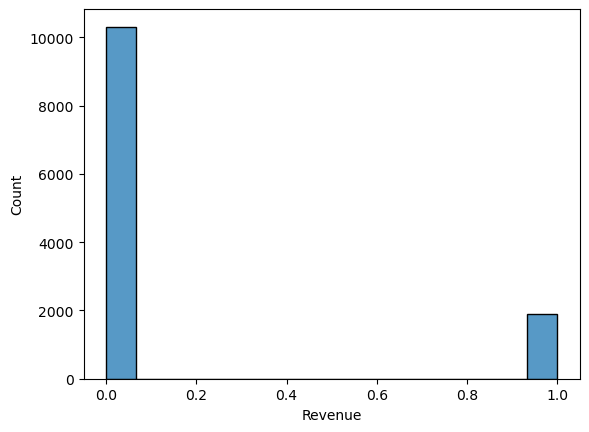

In [22]:
sns.histplot(df['Revenue'])

Наблюдается дисбаланс классов. Для проверки качества моделей необходимо будет использовать метрику, не чувствительную к дисбалансу, например f1

## Pandas VS Polars

In [23]:
state = np.random.RandomState(42)

In [24]:
df_new = df.sample(1_000_000, replace=True, random_state=state)
df_new.shape

(1000000, 18)

In [25]:
df_new.to_csv("df_big.csv", index=False)

### Загрузка данных

In [26]:
%%time
df = pd.read_csv('df_big.csv')

CPU times: total: 1.53 s
Wall time: 1.54 s


In [27]:
%%time
df_pl = pl.read_csv('df_big.csv')

CPU times: total: 2.11 s
Wall time: 216 ms


Polars тут оказался быстрее

Фильтрация данных

In [28]:
%%time
df.query('PageValues > 5')

CPU times: total: 141 ms
Wall time: 44 ms


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
2,3,89.60,0,0.0,57,1721.906667,0.000000,0.005932,204.007949,0.0,Nov,2,2,1,4,Returning_Visitor,True,True
3,1,30.00,3,0.0,99,3072.305403,0.001961,0.020507,7.300657,0.0,May,2,2,1,1,Returning_Visitor,True,False
7,1,28.20,0,0.0,35,942.687922,0.017143,0.035442,8.435207,0.0,Sep,1,1,1,2,Returning_Visitor,True,False
8,0,0.00,3,57.0,31,4547.166667,0.012903,0.039247,8.682742,0.0,Mar,2,4,5,2,Returning_Visitor,False,False
18,1,29.20,0,0.0,66,1364.873333,0.017188,0.036488,16.134700,0.0,Jul,1,1,8,1,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999971,6,257.50,0,0.0,37,2533.333333,0.014634,0.031707,6.651335,0.0,Nov,2,2,3,1,Returning_Visitor,False,True
999974,1,21.25,0,0.0,92,2716.519048,0.006738,0.037885,23.738911,0.0,Nov,2,2,3,2,Returning_Visitor,True,False
999986,8,139.20,0,0.0,49,3346.969048,0.000000,0.008472,12.574018,0.0,Nov,2,6,1,2,Returning_Visitor,False,False
999988,6,53.00,0,0.0,40,778.833333,0.000000,0.009470,8.480846,0.0,Aug,1,1,1,4,New_Visitor,True,False


In [29]:
%%time 

df_pl.filter(pl.col('PageValues') > 5)

CPU times: total: 297 ms
Wall time: 25 ms


Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
i64,f64,i64,f64,i64,f64,f64,f64,f64,f64,str,i64,i64,i64,i64,str,bool,bool
3,89.6,0,0.0,57,1721.906667,0.0,0.005932,204.007949,0.0,"""Nov""",2,2,1,4,"""Returning_Visi…",true,true
1,30.0,3,0.0,99,3072.305403,0.001961,0.020507,7.300657,0.0,"""May""",2,2,1,1,"""Returning_Visi…",true,false
1,28.2,0,0.0,35,942.687922,0.017143,0.035442,8.435207,0.0,"""Sep""",1,1,1,2,"""Returning_Visi…",true,false
0,0.0,3,57.0,31,4547.166667,0.012903,0.039247,8.682742,0.0,"""Mar""",2,4,5,2,"""Returning_Visi…",false,false
1,29.2,0,0.0,66,1364.873333,0.0171875,0.036488,16.1347,0.0,"""Jul""",1,1,8,1,"""Returning_Visi…",true,false
2,58.4,0,0.0,54,3708.392857,0.002632,0.020468,11.703164,0.0,"""Sep""",4,2,9,13,"""Returning_Visi…",false,true
3,1528.25,2,91.0,60,1548.08631,0.006349,0.025926,22.923412,0.0,"""Nov""",1,1,1,2,"""Returning_Visi…",true,false
1,58.4,1,24.2,11,503.266667,0.018182,0.036364,24.722092,0.0,"""Oct""",3,2,1,1,"""Returning_Visi…",false,true
10,163.633333,1,294.0,80,1979.3,0.002326,0.024225,19.733354,0.0,"""Nov""",2,1,2,2,"""Returning_Visi…",true,true


Время фильтрации почти не отличается

### Агрегация данных

In [30]:
%%time
df.groupby('Month').agg({'Informational_Duration' : 'mean', 'PageValues' : 'max'})

CPU times: total: 125 ms
Wall time: 132 ms


,Informational_Duration,PageValues
Month,,
Aug,35.888160,153.577697
Dec,37.586360,360.953384
Feb,2.402862,54.179764
Jul,45.451474,79.443534
June,20.619252,166.373553
Mar,30.566001,261.491286
May,26.983759,254.607158
Nov,43.972072,361.763742
Oct,37.711255,246.758590


In [31]:
%%time

q = (
    df_pl
    .lazy()
    .groupby(by='Month')
    .agg(
        [
            pl.col('Informational_Duration').mean(),
            pl.col('PageValues').max()
        ]
    )
)

CPU times: total: 0 ns
Wall time: 0 ns


In [32]:
%%time

q.collect()

CPU times: total: 156 ms
Wall time: 82 ms


Month,Informational_Duration,PageValues
str,f64,f64
"""Mar""",30.566001,261.491286
"""June""",20.619252,166.373553
"""Feb""",2.402862,54.179764
"""Dec""",37.58636,360.953384
"""aug""",65.81668,128.827869
"""Jul""",45.451474,79.443534
"""Nov""",43.972072,361.763742
"""Sep""",32.630801,258.549873
"""May""",26.983759,254.607158


Pandas тут оказался чуть быстрее

### Вывод 

В задаче загрузки данных намного быстрее Polars, в агрегации Pandas немного лучше, а в фильрации ничья.